# Exploring US Baby Names 1880 - 2016

In [1]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data identification and collection

My aim for the data identification and collection was to choose an appropriate dataset to be used. I chose the US baby name dataset. 

When I downloaded it I found that there were numerous files in the folder. My next aim was to aggregate all these into one file with field labels - names, sex, number, year. 

The year field would be something I want to use in my data analysis so I wanted to make it while doing this process. I managed to do this by executing the following block of code. The dataset I used for my preparation and analysis was 'yob1880_2016.txt'.

In [5]:
# This for loop is used to output a new txt file with field labels
# The field labels are defined in field_labels.txt besides year which is a field I created
for i in range(1880,2017):
    # This is a string of a text file of a certain year e.g yob1880.txt
    read = "yob" + str(i) + ".txt"
    # The new txt file outputted would be yob1880new.txt. This would have a field that detailed the year
    readnew = "yob" + str(i) + "new.txt"
    df = pd.read_csv(read)
    filenames = ['field_labels.txt', read]
    
    with open(readnew, 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                outfile.write(infile.read())
    
    df = pd.read_csv( readnew )
    # A year field is created with value 'i' which is the year file being opened
    df['year']=i
    df.to_csv(readnew, sep=',', index=False)

# This for loop is used to read in the new txt files and split the lines before outputting into the same file
for i in range(1880,2016):  
    readnew = "yob" + str(i) + "new.txt"
    with open(readnew, 'r') as fin:
        data = fin.read().splitlines(True)
    with open(readnew, 'w') as fout:
        fout.writelines(data[1:])

# This for loop saves all the filenames in a txt to be used in the next step
filenames = []
for i in range(2016, 1879, -1):
    filenames.append("yob" + str(i) + "new.txt")

# This is used to aggregate all of the files into just one file called yob1880_2016.txt with field labels
with open('yob1880_2016.csv', 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                outfile.write(infile.read())

FileNotFoundError: File b'yob1880.txt' does not exist

## Data Preparation

My approach to preparing the data was:
- to ensure that the fields and field labels were correct.
- to ensure that the data types of the fields were correct.
- to ensure there were no missing values.

In [2]:
df = pd.read_csv( "yob1880_2016.csv" )
df.sort_values(['number'], ascending = False).head(5)

,names,sex,number,year
1450464,Linda,F,99685,1947
1440225,Linda,F,96210,1948
1456567,James,M,94762,1947
1349744,Michael,M,92716,1957
1456568,Robert,M,91641,1947


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891894 entries, 0 to 1891893
Data columns (total 4 columns):
names     object
sex       object
number    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 57.7+ MB


In [8]:
df.isnull().sum()

names     0
sex       0
number    0
year      0
dtype: int64

The following code creates a new column called "year%". This is the percentage of each respective name to the sum of the toal sum of the numbers for each year. I made this column just to get a general idea of how popular the name was for the respective year.

In [9]:
df['year%'] = (df.number.values/df.groupby(['year'])['number'].transform(sum).values)*100
df.head(10)

,names,sex,number,year,year%
0,Emma,F,19414,2016,0.533744
1,Olivia,F,19246,2016,0.529126
2,Ava,F,16237,2016,0.446400
3,Sophia,F,16070,2016,0.441809
4,Isabella,F,14722,2016,0.404748
5,Mia,F,14366,2016,0.394961
6,Charlotte,F,13030,2016,0.358231
7,Abigail,F,11699,2016,0.321638
8,Emily,F,10926,2016,0.300386
9,Harper,F,10733,2016,0.295080


**Conclusion: **The data has no missing values and all columns have correct data type. The fields and field labels were also all correct. Thus, the preparation of data is complete and can now be analysed.

## Data Analysis and Interpretation

I had a few ideas that I wanted to explore in relation to names in this assignment. The dataset is detailed and has all necessary fields to make some very interesting insights in my opinion.

For my first insight I wanted to explore the data to see what the 5 most popular names were for boys and girls since the first year in the data.

### - Top 5 Most Popular names for boys and girls

In [4]:
# This function creates specific plots when called
# a dataframe, string defining gender in dataframe and hexadecimal colour are arguments for this function
def makeplot(df, gender, clr):
    
    # groups df by names and sums up all occurences of each name into column number
    df_pop = (df.groupby('names').agg({'number': 'sum'}).sort_values('number', ascending=False))
    
    # plot customisation
    ax = df_pop.head(5).plot.bar(figsize=(13, 7), title="Top 5 most popular "+gender+" names from 1880 - 2016", color=clr)
    ax.set_xlabel("Number of registered babies")
    ax.set_ylabel("Names")

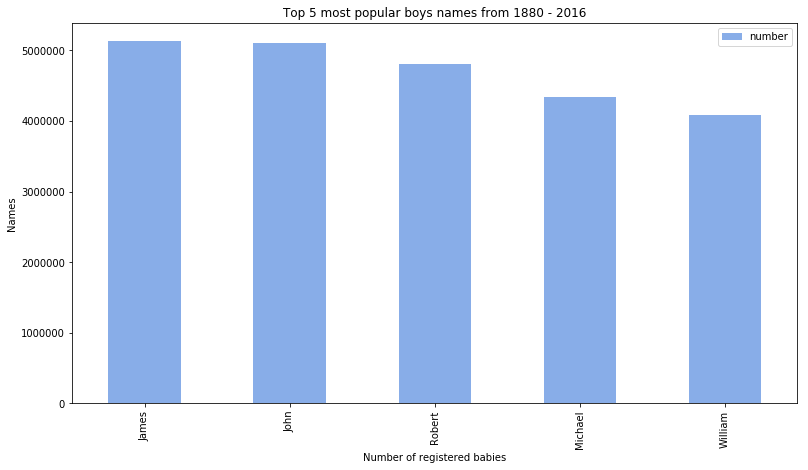

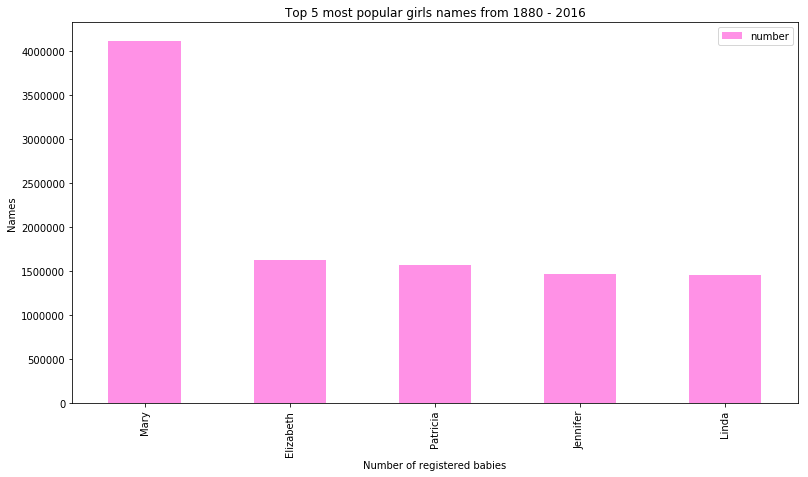

In [5]:
# all occurences of each gender saved into their own respective dataframe.
df_boys = df[df["sex"] == 'M']
df_girls = df[df["sex"] == 'F']
makeplot(df_boys, "boys", "#88ade8")
makeplot(df_girls, "girls", "#ff91e6")

#### Insight 1 conclusion
After exploring the first insight, I found it was interesting to see the specific names that were popular for both boys and girls over time. It was strange to see that all of the top 5 most popular boys names had a number of registered individuals over 400 thousand, however, only one of the top 5 most popular girls names exceeded this. After exploring this, I was very curious to see if popular individuals had an impact on specific names. 

### - Impact of Influencers
I chose to examine the impact of popular individuals/charcters on baby names as my next insight. The following are categories I used in my exploration: 
- ** Popular Athletes **
- ** Popular Singers **
- ** Popular Actors and Characters **

This is the function I used to plot the trends of names of popular individuals I wanted to explore:

In [7]:
# The function takes in two string arguments detailing the name and sex of the popular individual 
def graph_trend(nme, gdr):
    df_trend = df[(df["names"] == nme) & (df["sex"] == gdr)]
    df_trend = df_trend[::-1]
    ax = df_trend.plot(style=".-", x="year", y="number",figsize=(17, 7), title="The trend of the name "+nme)
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of registered babies")
    return ax

### Popular Athletes
### 1. Conor McGregor

The below visualisation is showing the increase in popularity of the name Conor. Conor peaked at its popularity in 1993 but it can be seen that there was another noticeable peak in 2016 years in particular. This can be concluded to be because of the Irish UFC star Conor McGregor who has become increasingly popular in the US.

#### Top 5 most popular years of name 'Conor'

In [32]:
df[df["names"] == 'Conor'].sort_values(['number'], ascending = False).head(5)

,names,sex,number,year,year%
737145,Conor,M,1250,1993,0.033164
19079,Conor,M,1082,2016,0.029747
762977,Conor,M,924,1992,0.024062
711177,Conor,M,866,1994,0.023301
685108,Conor,M,850,1995,0.023216


#### Overall trend of the name 'Conor'

(1975, 2016)

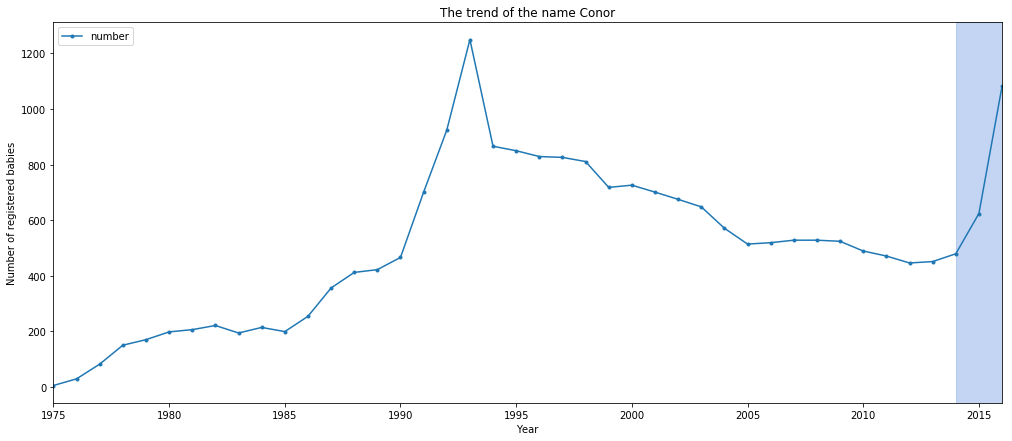

In [8]:
ax = graph_trend('Conor', 'M')
ax.axvspan(2014, 2016, alpha=0.5, color='#88ade8')
ax.set_xlim([1975,2016])

**Conclusion: **The highlighted blue portion on the graph is highlighting the upward trend that represents the increase in popularity of the name Conor in recent years. This highlighted portion represents Conor McGregor's active fighting career. Previous to this highlighted period, the name Conor had a negative trend. Thus, it can be concluded that because of Conor McGregor's increasing popularity in the US, the name Conor has become very popular once again.

### 2. Cassius Clay a.k.a Muhammad Ali

"Muhammad Ali born Cassius Marcellus Clay Jr was an American professional boxer and activist. He is widely regarded as one of the most significant and celebrated sports figures of the 20th century. From early in his career, Ali was known as an inspiring, controversial, and polarizing figure both inside and outside the ring." - ** Wikipedia **

#### Top 5 most popular years of name 'Cassius'

In [33]:
df[df["names"] == 'Cassius'].sort_values(['number'], ascending = False).head(5)

,names,sex,number,year,year%
19358,Cassius,M,444,2016,0.012207
52566,Cassius,M,403,2015,0.010940
85803,Cassius,M,345,2014,0.009342
119111,Cassius,M,299,2013,0.008226
186536,Cassius,M,237,2011,0.006492


#### Overall trend of the name 'Cassius'

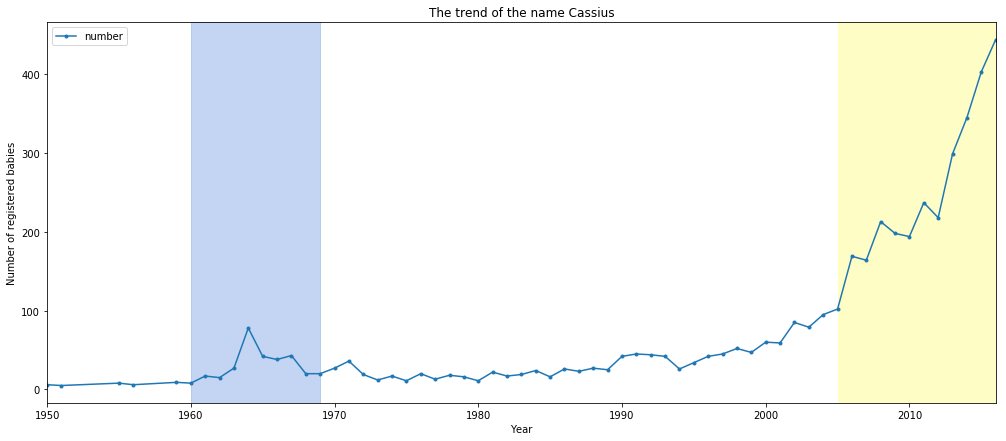

In [37]:
ax = graph_trend('Cassius', 'M')
ax.set_xlim([1950,2016])
ax.axvspan(1960, 1969, alpha=0.5, color='#88ade8')
ax.axvspan(2005, 2016, alpha=0.5, color='#fffd8e')

**Conclusion: **I highlighted two areas on this plot: 
- The blue area highlights Cassius' active boxing career, a small peak can be seen in this time as he was a very popular boxing figure.
- The yellow area highlights a very interesting part of the plot in my opinion. Ever since 2000, the name Cassius has become increasingly popular. In 2016, the name peaked at an all time high. This was the year that Cassius passed away. The increasing trend even after he retired from boxing demonstrates how much of an impact he had on it being used.

### Popular Singers
### 1. Britney Spears

"Britney Jean Spears (born December 2, 1981) is an American singer, dancer, and actress. Born in McComb, Mississippi, and raised in Kentwood, Louisiana, she performed acting roles in stage productions and television shows as a child before signing with Jive Records in 1997. Spears's first and second studio albums, ...Baby One More Time (1999) and Oops!... I Did It Again (2000), became massive international successes, with the former becoming the best-selling album by a teenage solo artist." - **Wikipedia**

#### Top 5 most popular years of name 'Britney'

In [87]:
df[df["names"] == 'Britney'].sort_values(['number'], ascending = False).head(5)

,names,sex,number,year,year%
822442,Britney,F,2495,1989,0.064917
529578,Britney,F,2403,2000,0.063611
797743,Britney,F,2293,1990,0.058040
846234,Britney,F,2083,1988,0.056402
772668,Britney,F,1784,1991,0.045812


#### Overall trend of the name 'Britney'

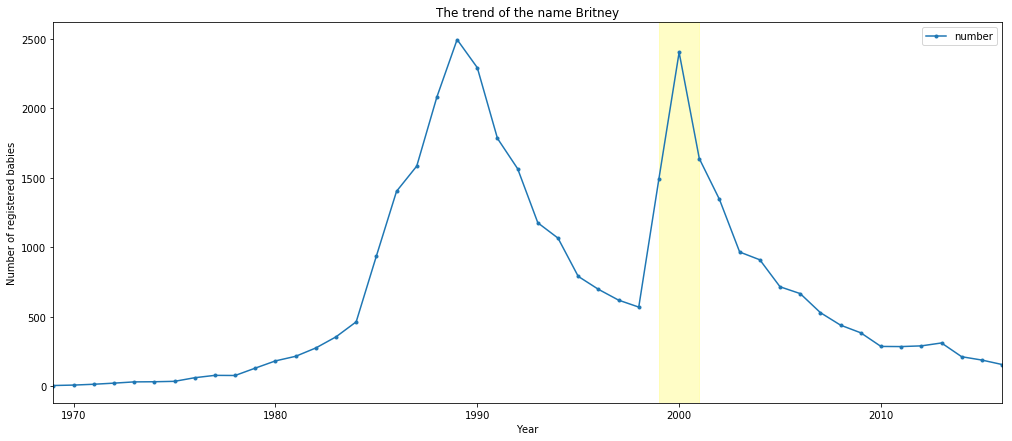

In [18]:
ax = graph_trend('Britney', 'F')
ax.set_xlim([1969,2016])
ax.axvspan(1999, 2001, alpha=0.5, color='#fffd8e')

**Conclusion: **The peak at 2000, highlighted by the yellow are demonstrates the significant impact Britney Spears had on the name Britney. This was the year that she was at the height of her popularity. 
I found it interesting to see the shear drop in use of this name in the years after this. In my opinion, this could potentially be due to her controversies which thus meant less people chose to use this name. I found this very insightful as it yet again demonstrated the significant impact a popular individual can have on name choice.

### 2. Elvis Presley

"Elvis Aaron Presley was an American singer, musician, and actor. Regarded as one of the most significant cultural icons of the 20th century, he is often referred to as the "King of Rock and Roll" or simply "the King"" - ** Wikipedia **

#### Top 5 most popular years of name 'Elvis'

In [102]:
df[df["names"] == 'Elvis'].sort_values(['number'], ascending = False).head(5)

,names,sex,number,year,year%
1350055,Elvis,M,599,1957,0.014262
1361539,Elvis,M,419,1956,0.010167
1338636,Elvis,M,373,1958,0.009028
1058999,Elvis,M,365,1978,0.011499
576700,Elvis,M,361,1999,0.009777


#### Overall trend of the name 'Elvis'

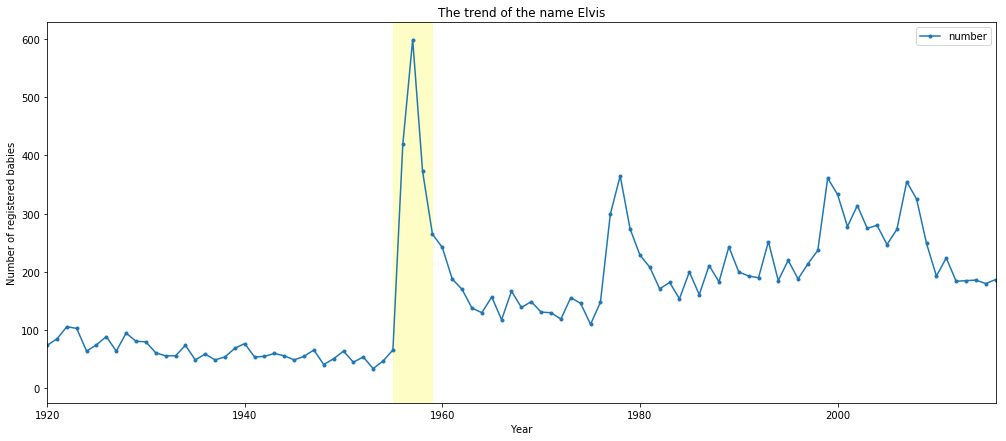

In [19]:
ax = graph_trend('Elvis', 'M')
ax.set_xlim([1920,2016])
ax.axvspan(1955, 1959, alpha=0.5, color='#fffd8e')

**Conclusion: **The yellow highlighted area shows the heighest peak of the name 'Elvis'. This was arguably the pinnacle of Elvis Presley's career. He was a massive star in the US and had released 3 singles during 1957 that all made their way to number 1. This popularity obviously had an impact on people choosing to name their baby after him. The number of babies named in 1957 peaked at 599.

It was also interesting to me to see how the name Elvis has not retreated to under 100 names per year. He obviously remains a popular individual to people in the US presently. This is a different trend to that of Britney which has decreased consistently since it peaked.

### Popular Characters
### 1. Forrest Gump - Movie character

"Forrest Gump is a 1994 American drama film based on the 1986 novel of the same name by Winston Groom. " - ** Wikipedia **

#### Top 5 most popular years of name 'Forrest'

In [144]:
df[df["names"] == 'Forrest'].sort_values(['number'], ascending = False).head(5)

,names,sex,number,year,year%
711089,Forrest,M,1343,1994,0.036135
737205,Forrest,M,948,1993,0.025152
685104,Forrest,M,858,1995,0.023435
763003,Forrest,M,832,1992,0.021667
1717625,Forrest,M,792,1920,0.035002


#### Overall trend of the name 'Forrest'

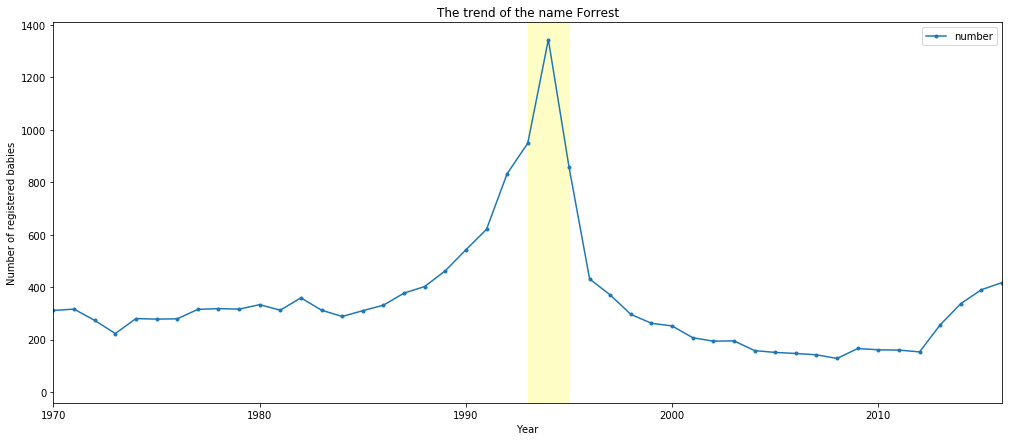

In [20]:
ax = graph_trend('Forrest', 'M')
ax.set_xlim([1970,2016])
ax.axvspan(1993, 1995, alpha=0.5, color='#fffd8e')

**Conclusion: **It was no surprise to me seeing an increase in 1994. This was the year the movie was released and it was hugely popular in the US.

### 2. Kylo Ren - Star Wars Character

"Kylo Ren is a fictional character in the Star Wars franchise. Introduced in the 2015 film Star Wars: The Force Awakens." - ** Wikipedia **

#### Top 5 most popular years of name 'Kylo'

In [99]:
df[df["names"] == 'Kylo'].sort_values(['number'], ascending = False).head(5)

,names,sex,number,year,year%
19657,Kylo,M,238,2016,0.006543
55190,Kylo,M,35,2015,0.000950
94347,Kylo,M,8,2014,0.000217
13602,Kylo,F,7,2016,0.000192
163480,Kylo,M,6,2012,0.000164


#### Overall trend of the name 'Kylo'

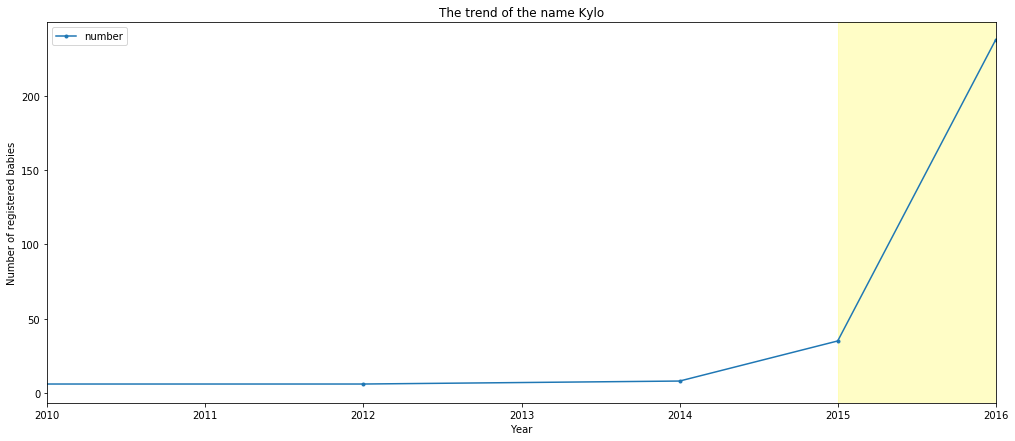

In [22]:
ax = graph_trend('Kylo', 'M')
ax.set_xlim([2010,2016])
ax.axvspan(2015, 2016, alpha=0.5, color='#fffd8e')

** Conclusion: **I think this visualisation captures the impact of popular individuals on baby names very concisely. The Star Wars movie was released in late December which explains why there was not a drastic increase until 2016. 

#### Insight 2 Conclusion
The influence of these popular individuals are unquestionably present. I found that this exploration was very interseting overall. This insight showed me the extent of the influence that these popular individuals can have. This was always something that I wanted to examine closely. I thought that all name explorations I made were very insightful. Some visualisation peaks were different due to the popularity diffences of the individuals.

I did find that it is sometimes difficult to figure out why a specific peak exists in a visualisation. In particular, a peak exists in the visualisation of the name 'Britney' in the year 1989. I could not decipher what the cause of this specific peak was. It was also interesting to see that even popular Irish individuals like Conor McGregor have such an impact. Overall, I felt that this was a successful insight into the impact of popular individuals on baby names.

## Overall Conclusion
It was fascinating to see the information and conclusions that could be done from just manipulating the data with a few lines of code. Initially I did not know what I wanted to explore in the data , however, I was slightly intriguied to see the most popular US names for boys and girls. I found that after exploring this insight, I had another question that I had not thought about previously which was the impact of influencers on names. One question leads to another. I believe I am able to interpret this data fully after doing these insights.

### What further analysis might be done on the data?
I think that further analysis could be done in relation to popularity. I would have liked to create a field that ranks the names popularity by comparing its 'numbers' to the previous years 'numbers'. After doing this, I think that exploring the difference of popularity rank of names from year to year would lead to some interesting insights. Some of these popular names more than likely were impacted by popular influencers which is the insight I explored. However by creating this field, I think more indepth analysis can be done that could lead to some interesting conclusions being made.